# BodyPix - Remove background

**References**
-  Nicholas Renotte (2021) Body Segmentation with Python and Tensorflow BodyPix | Plus and AI Background Removal 
  https://www.youtube.com/watch?v=0tB6jG55mig&ab_channel=NicholasRenotte
- tensorflow / tfjs-models  
  https://github.com/tensorflow/tfjs-models/tree/master/body-pix

## Setup and dependencies
- `tensorflow`
- `tensorflow-gpu`
- `tf_bodypix`
- `opencv_python`
- `tfjs_graph_converter`: converts `tensorflow js bodypix` model into a python model. 

In [1]:
import tensorflow as tf
from tf_bodypix.api import download_model, load_model, BodyPixModelPaths
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Show Matplotlib's plots inside a Jupyter Notebook
%matplotlib inline

## Black out background

In [2]:
# tfjs_graph_converter transforms the tfjs-model into a form which the python environment can run.
bodypix = load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))

In [3]:
cap = cv2.VideoCapture(0)

# Loop through frames 
while cap.isOpened():
    ret, frame = cap.read()
    
    # BodyPix Detections
    result = bodypix.predict_single(frame)
    mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
    masked_image = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('BodyPix', masked_image)

    if cv2.waitKey(10) &  0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

(-0.5, 642.5, 511.5, -0.5)

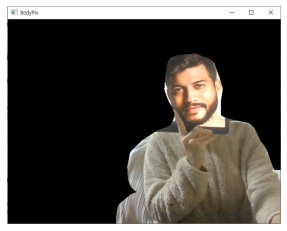

In [29]:
path = "C:\\Users\\youre\\Desktop\\background_block.png"
black_bg = cv2.imread(path)
black_bg = cv2.cvtColor(black_bg, cv2.COLOR_BGR2RGB)
plt.imshow(black_bg)
plt.axis('off')

## Add Vrtual Background

In [55]:
# images from pexel. source stated in the image paths.
img1 = "C:\\Users\\youre\\Desktop\\pexels-tim-mossholder-383646.jpg"
img2 = "C:\\Users\\youre\\Desktop\\pexels-laura-james-6102004.jpg"
img3 = "C:\\Users\\youre\\Desktop\\pexels-toni-cuenca-695971.jpg"

In [52]:
img1 = cv2.imread(img1)
img2 = cv2.imread(img2)
img3 = cv2.imread(img3)

img1.shape, img2.shape, img3.shape

((4800, 7200, 3), (3360, 5040, 3), (3840, 5760, 3))

In [53]:
def resize_img(path, height=480):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    (h, w) = img.shape[:2]
    ratio = height / float(h)
    width = int(w * ratio)
    return cv2.resize(img, (width, height))    

In [56]:
WIDTH = frame.shape[1]
img1 = resize_img(img1)
img2 = resize_img(img2)
img3 = resize_img(img3)

In [13]:
frame.shape

(480, 640, 3)

In [57]:
img1.shape, img2.shape, img3.shape

((480, 720, 3), (480, 720, 3), (480, 720, 3))

(480, 720, 3)


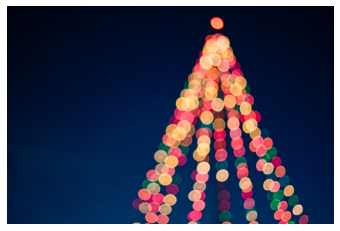

(480, 720, 3)


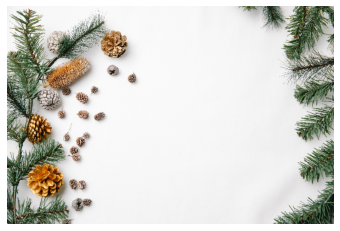

(480, 720, 3)


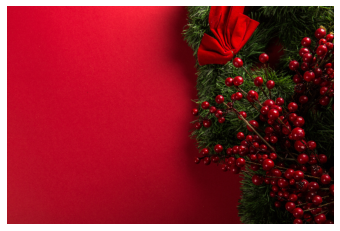

In [58]:
imgs = [img1, img2, img3]

for img in imgs:
    print(img.shape)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [59]:
WIDTH = frame.shape[1]
imgs = [img[:, :WIDTH, :] for img in imgs]
img_shapes = [img.shape for img in imgs]
print(img_shapes)

[(480, 640, 3), (480, 640, 3), (480, 640, 3)]


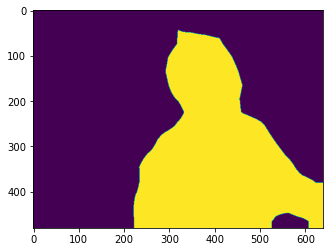

In [20]:
plt.imshow(mask)

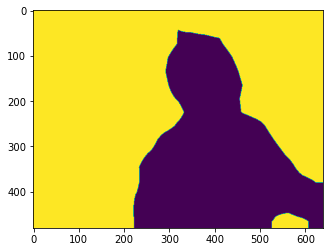

In [21]:
plt.imshow(np.where(np.add(mask, -1) == -1, 1, np.add(mask, -1)))

In [63]:
cap = cv2.VideoCapture(0)

imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in imgs]

# Loop through frames
while cap.isOpened():
    ret, frame = cap.read()
    
    # BodyPix Detections
    result = bodypix.predict_single(frame)
    mask = result.get_mask(threshold=0.5).numpy().astype(np.uint8)
    masked_image = cv2.bitwise_and(frame, frame, mask=mask)
    
    # Apply virtual background
    neg = np.add(mask, -1)  # body == 0, non-body region == -1
    inverse = np.where(neg== -1, 1, neg).astype(np.uint8)
    bg = cv2.cvtColor(imgs[2], cv2.COLOR_BGR2RGB)
    masked_background = cv2.bitwise_and(bg, bg, mask=inverse)
    final = cv2.add(masked_image, masked_background)

    
    cv2.imshow('BodyPix', final)

    if cv2.waitKey(10) &  0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

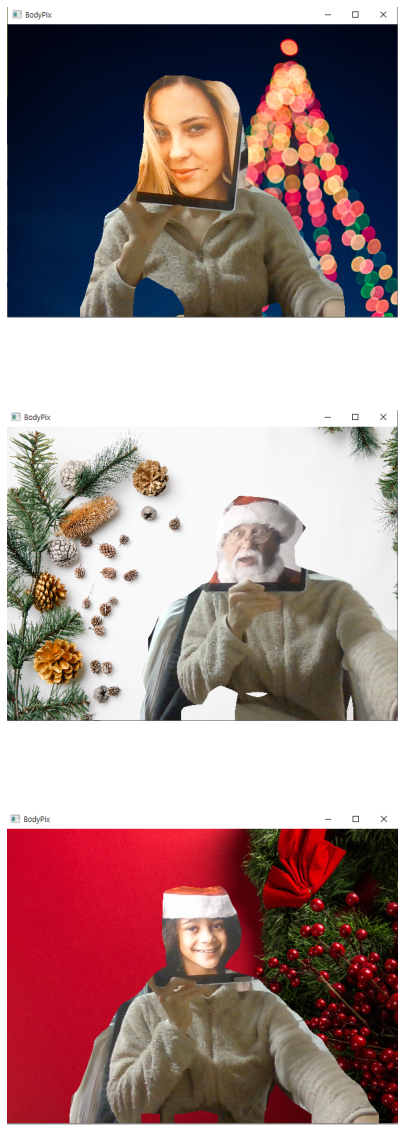

In [71]:
path1 = "C:\\Users\\youre\\Desktop\\test1.png"
path2 = "C:\\Users\\youre\\Desktop\\test2.png"
path3 = "C:\\Users\\youre\\Desktop\\test3.png"

paths = [path1, path2, path3]
fig, axes = plt.subplots(3, 1, figsize=(7, 21))

for i, path in enumerate(paths):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    axes[i].imshow(img)
    axes[i].axis('off')